# Analyzing Time Series Data

## Intialization

### Connect to Drive

In [2]:
# Use for normal projects
# In colab since I use that for other subjects as well I have partitioned it accordingly 
# But for my local drive I like to keep it simple
import os
import sys
from pathlib import Path
if 'google.colab' in str(get_ipython()):
  print('Running on Colab')
  from google.colab import drive
  drive.mount('/content/drive') 
  %pip install swifter -qq
  %pip install spotipy --upgrade -qq
  base_folder = Path('/content/drive/MyDrive/colab_notebooks/')
  subject = 'aml'
  data = base_folder/subject/'data/'
  archive = base_folder/subject/'archive/'
  output = base_folder/subject/'output'
  if not Path(base_folder/subject/'output').exists():
    os.makedirs(output,exist_ok=True)
  print(f'Base Folder is {base_folder}')
  print(f'Data Folder is {data}')
  print(f'Archive Folder is {archive}')
  print(f'Output Folder is {output}')
else:
  print('Not Running on Colab')
  # Add the path to the custom-functions directory in the local file system to sys.path
  sys.path.append('C:/Users/Abdul Rauf Maroof/OneDrive/Documents/MSBA/custom_functions')
  base_folder = Path('C:/Users/Abdul Rauf Maroof/OneDrive/Documents/MSBA')
  data = base_folder/'data_sets'
  archive = base_folder/'archive'
  output = base_folder/'output'
  if not (base_folder/'output').exists():
    os.makedirs(output,exist_ok=True)
  print(f'Base Folder is {base_folder}')
  print(f'Data Folder is {data}')
  print(f'Archive Folder is {archive}')
  print(f'Output Folder is {output}')
  print(f'The path to the custom functions is {sys.path[-1]}')
  print(f'The working directory is {os.getcwd()}')

Not Running on Colab
Base Folder is C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA
Data Folder is C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\data_sets
Archive Folder is C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\archive
Output Folder is C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\output
The path to the custom functions is C:/Users/Abdul Rauf Maroof/OneDrive/Documents/MSBA/custom_functions
The working directory is c:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\notebooks\Time_Series_Analysis


### Import Libraries

In [3]:
import numpy as np # to work with arrays and perform operations on it
import pandas as pd # to work with dataframes and perform operations on it
import matplotlib.pyplot as plt # to plot graphs
import scipy.stats as stats # to perform statistical operations
import scipy.stats as norm # to perform normality tests

import seaborn as sns # to plot graphs
from datetime import datetime, timedelta # to work with datetime and perform operations on it 
import time # to work with time 

import swifter # to apply functions on pandas dataframe in parallel
import zipfile # to work with zip files

In [4]:
# This code block is to set the default style for the plots

# set the default style for the plots
plt.style.use('seaborn')
# set the default size of the plots
plt.rcParams['figure.figsize'] = (16, 9)
# set the default font size for the plots
plt.rcParams['font.size'] = 14
# set the default style for the plots
plt.rcParams['lines.linewidth'] = 2
# set the default marker size for the plots
plt.rcParams['lines.markersize'] = 10

### Unzip data files

In [5]:
zips = [x for x in archive.iterdir() if 'zip' in x.name]
for entry in archive.iterdir():
  if 'zip' in entry.name:
    print(entry.name)

air_quality_data.zip
my_spotify_data.zip
my_spotify_data_2.zip
Spotify-20230303T164824Z-001.zip
stock_data.zip


#### Ozone Data

In [6]:
file = zips[0]

with zipfile.ZipFile(file,'r') as f:
  print(f.namelist())
  f.extractall(data)
  print('\n',f'Data was extracted to {data}')

['co_cities.csv', 'nyc.csv', 'ozone_nyc.csv', 'ozone_nyla.csv']

 Data was extracted to C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\data_sets


#### Stocks Data

In [7]:
file = zips[-1]

with zipfile.ZipFile(file,'r') as f:
  print(f.namelist())
  f.extractall(data)
  print('\n',f'Data was extracted to {data}')

['5_stocks.csv', 'apple_google.csv', 'asset_classes.csv', 'components.csv', 'debt_unemployment.csv', 'djia.csv', 'djia2.csv', 'dow_jones.csv', 'fb.csv', 'gdp_growth.csv', 'goog_fb.csv', 'google.csv', 'index.csv', 'listings.xlsx', 'market_cap_series.csv', 'msft_aapl.csv', 'nyse.csv', 'random_walk.csv', 'sp500.csv', 'stock_data.csv', 'stocks_4.csv', 'tickers.csv', 'unrate.csv', 'unrate_2000.csv', 'yahoo.csv']

 Data was extracted to C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\data_sets


## Time series Analysis: Solving Problems

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


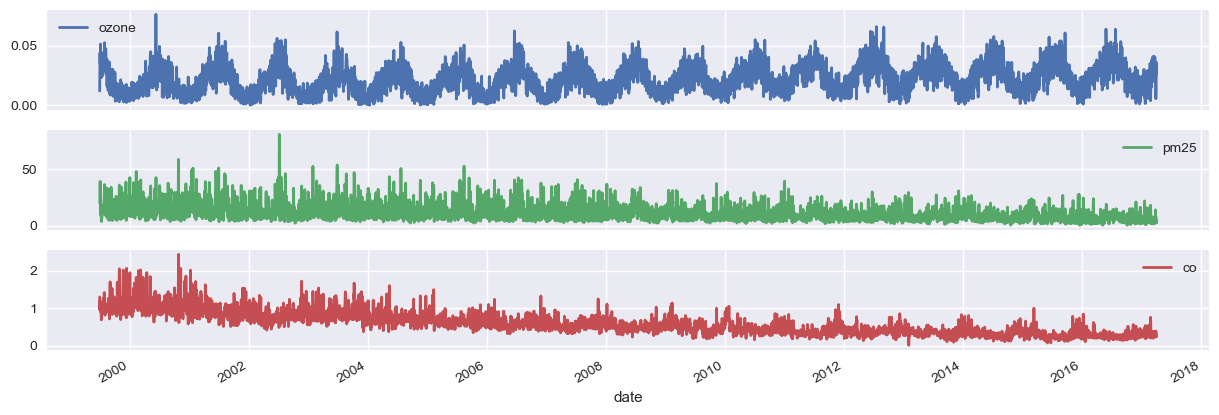

In [8]:
# Read data from csv file
# In the case of date column we need to parse it as a date
# We also need to set the date column as the index ideally when we are performing time series analysis
nyc_df = pd.read_csv(data/'nyc.csv',parse_dates=['date'],index_col='date')
print(nyc_df.info())

# Plot the data
nyc_df.plot(subplots= True, figsize=(15,5))
plt.show()

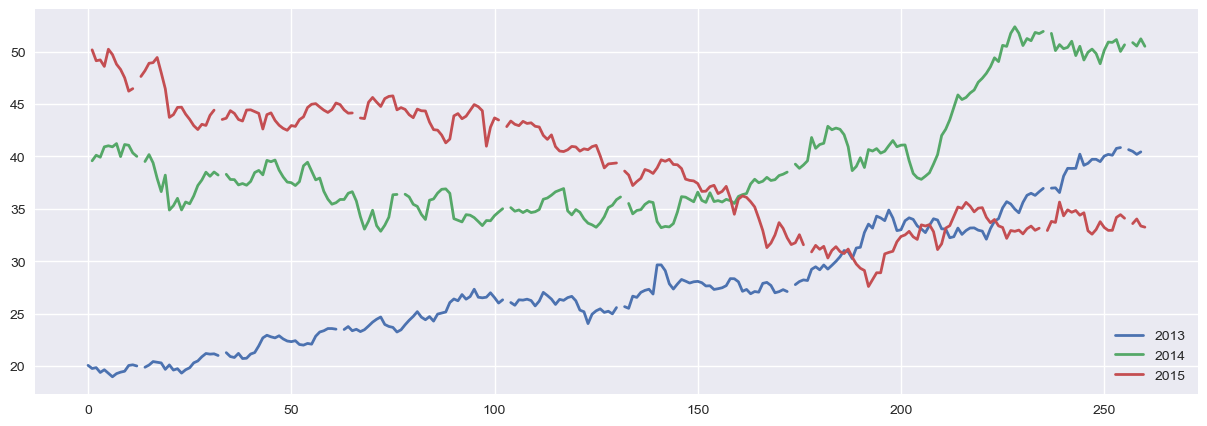

In [9]:
# import yahoo data
yahoo = pd.read_csv(data/'yahoo.csv',parse_dates=['date'],index_col='date')

# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot(figsize=(15,5))
plt.show()


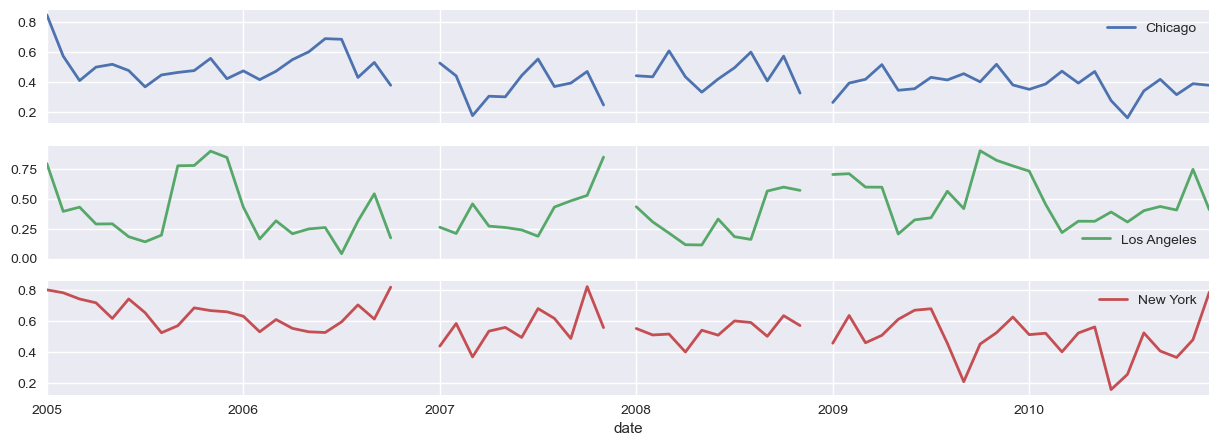

In [10]:
# Load co_cities dataset
co_cities = pd.read_csv(data/'co_cities.csv',parse_dates=['date'],index_col='date')

# Use different frequency for each city
co_cities = co_cities.asfreq('M')
co_cities.plot(subplots=True, figsize=(15, 5))
plt.show()

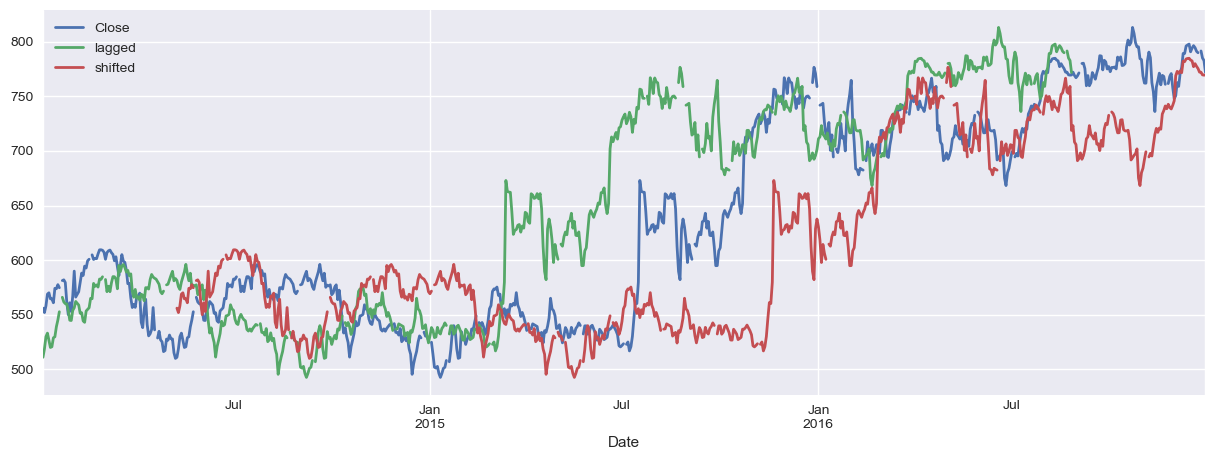

In [11]:
# Shift is an inbuilt function in pandas
# It shifts the data by the number of periods specified
# It is a time series function

# Import data here
google = pd.read_csv(data/'google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(-90)
google['shifted'] = google.Close.shift(90)

# Plot the google price series
google.plot(figsize=(15, 5))
plt.show()

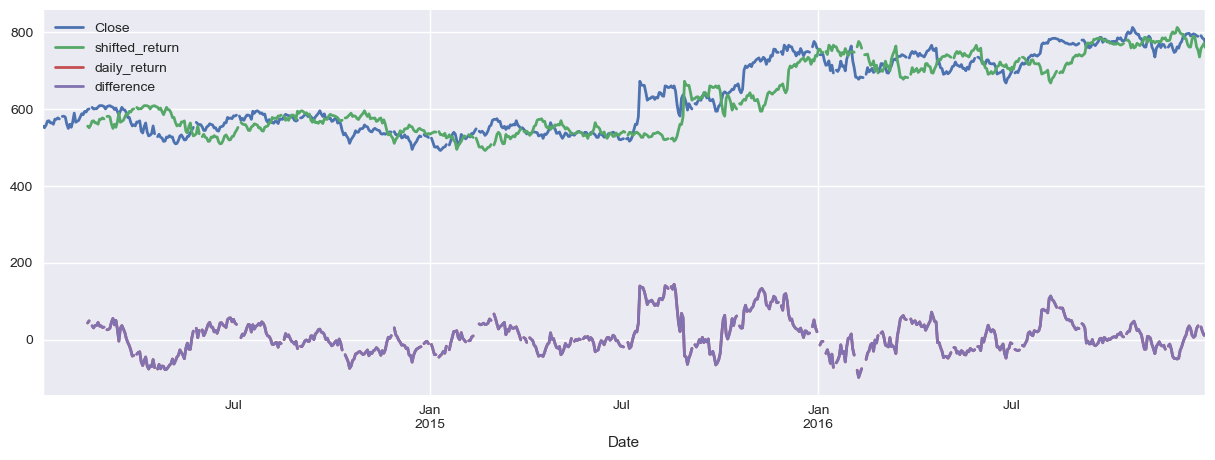

In [12]:
# Another use of the shift function is to calculate the percentage change in the data
# This is a very common operation in time series analysis
# We can use the shift function to calculate the percentage change in the data

# Import data here
google = pd.read_csv(data/'google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create shifted_return
google['shifted_return'] = google.Close.shift(30)

# Create daily_return
google['daily_return'] = google.Close - google.shifted_return

# The diff() function is used to calculate the difference between the current value and the previous value
# same as the manual calculation we did above
google['difference'] = google.Close.diff(30)
google[['Close','shifted_return','difference','daily_return']]

# Plot the google price series
google.plot(figsize=(15,5))
plt.show()


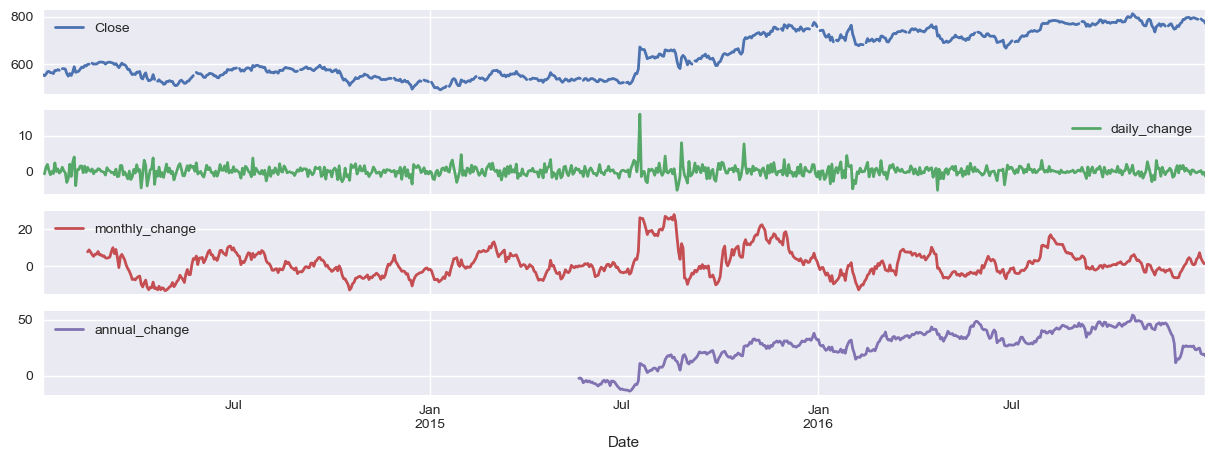

In [13]:
# Another useful function in pandas is pct_change()
# It calculates the percentage change in the data

# Import data here
google = pd.read_csv(data/'google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# # Create pct_change
google['daily_change'] = google.Close.pct_change(1) * 100
google['monthly_change'] = google.Close.pct_change(30) * 100
google['annual_change'] = google.Close.pct_change(360) * 100

# # Plot google price series
google.plot(subplots=True, figsize=(15, 5))
plt.show()



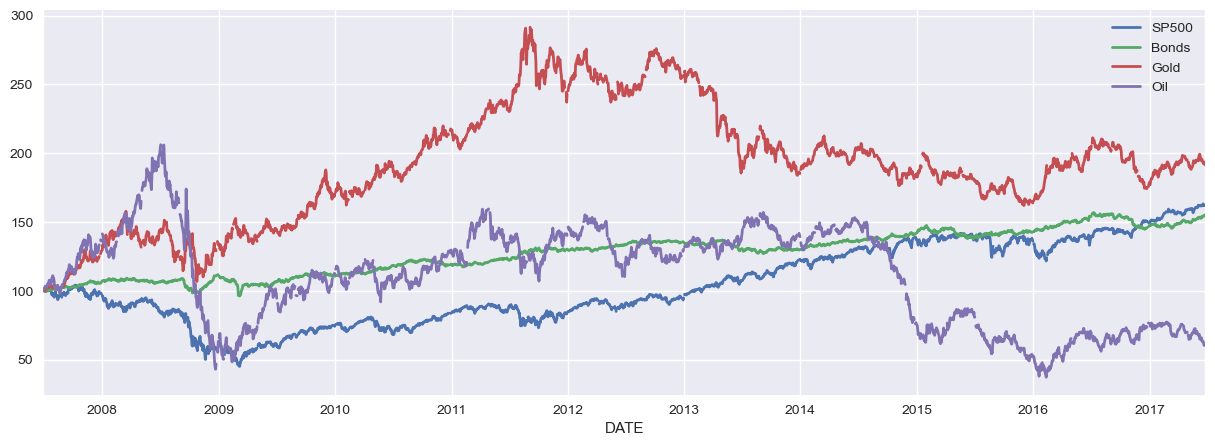

In [14]:
# Another useful concept to understand is the concept of normalization
# Normalization is the process of converting the data to a common scale
# This is done to make the data comparable
# Normalization is done by dividing the data by the first value in the series
# This is called the normalization constant
# The normalized data is then multiplied by 100 to convert it to a percentage

# Import data here
prices = pd.read_csv(data/'asset_classes.csv', parse_dates=['DATE'], index_col='DATE')

# Set data frequency to business daily
prices = prices.asfreq('B')

# Calculate the normalization constant
normalization_constant = prices.iloc[0]

# Normalize the data
# Intersetingly the pandas library has a div() function which is used to divide the data by a constant
# Similarly it has a mul() function which is used to multiply the data by a constant
# There are math functions like add(), sub() etc which can be used to perform mathematical operations on the data
normalized = prices.div(normalization_constant).mul(100)

# Plot the normalized data
normalized.plot(figsize=(15, 5))
plt.show()

# This makes it easier to compare the data
# We can see that the data is now comparable


In [15]:
# When use asfreq() function to resample the data we typically end up with missing values

# Import data here
google = pd.read_csv(data/'google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('M'); display(google.head())
print('\n')
google = google.asfreq('B'); display(google.head())

# An example of a forward fill is shown below along with reindexing
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start, end, freq='M')

# Create and print monthly here
monthly = pd.Series(data=[1,2], index=monthly_dates)
print(monthly,'\n')

# Create weekly_dates here
weekly_dates = pd.date_range(start, end, freq='W')
# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates, method='bfill'))



,Close
Date,
2014-01-31,589.89
2014-02-28,607.22
2014-03-31,556.70
2014-04-30,526.66
2014-05-31,NaN


,Close
Date,
2014-01-31,589.89
2014-02-03,NaN
2014-02-04,NaN
2014-02-05,NaN
2014-02-06,NaN


2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64 

2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64


In [16]:
# Another important concept is interpolation and extrapolation
# Interpolation is the process of estimating the value of a missing data point
# Extrapolation is the process of estimating the value of a data point outside the range of the data
# We can use the interpolate() function to perform interpolation
# We can use the extrapolate() function to perform extrapolation

# Import data here
google = pd.read_csv(data/'google.csv', parse_dates=['Date'], index_col='Date')
print(google.head(),'\n')

# Set data frequency to business daily
google = google.asfreq('B')

# Create and print 'google' here
google = google.interpolate()
print(google.head())

#interpolate() function by default uses linear interpolation
# Linear interpolation is the process of drawing a straight line between two points
# We can use the method parameter to specify the type of interpolation

             Close
Date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-04     NaN
2014-01-05     NaN
2014-01-06  558.10 

             Close
Date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-06  558.10
2014-01-07  568.86
2014-01-08  570.04


<AxesSubplot:xlabel='date'>

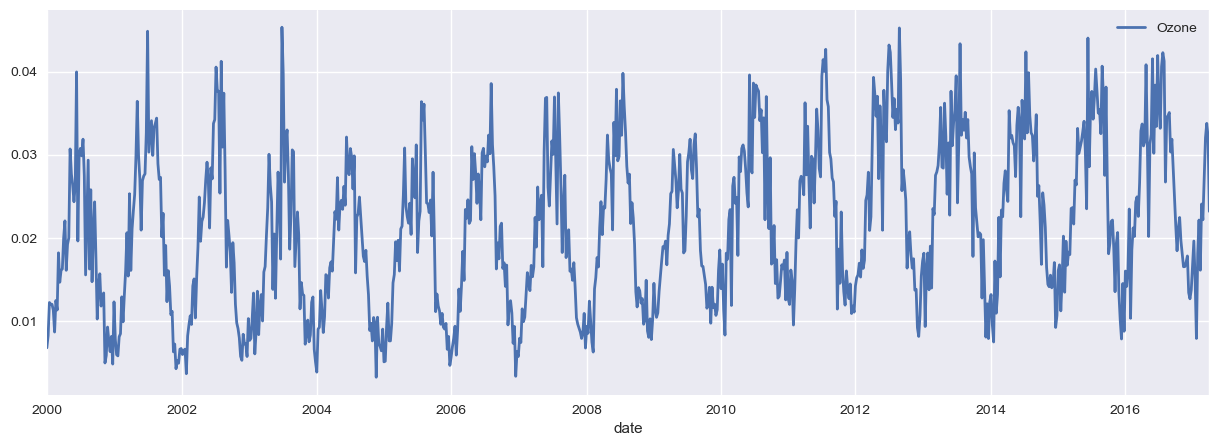

In [17]:
# Downsampling and aggregation
# Downsampling is the process of reducing the frequency of the data
# Aggregation is the process of combining the data to form a summary

# Import data here
ozone = pd.read_csv(data/'ozone_nyc.csv', parse_dates=['date'], index_col='date')

ozone.resample('W').mean().plot(figsize=(15, 5))

# Another function we can use is squeeze()
# This function is used to convert a dataframe to a series
# This is useful when we want to perform operations on the data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None 



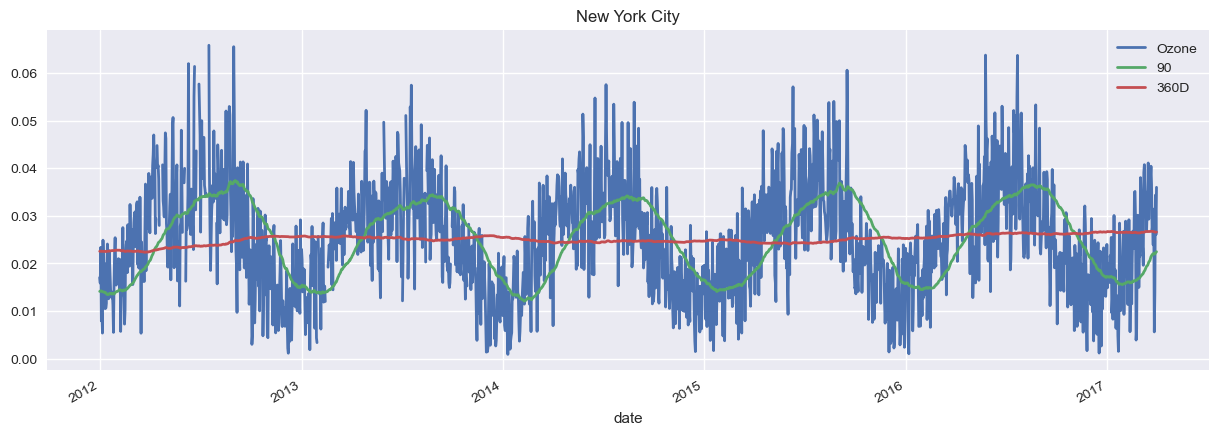

In [18]:
# Finally we can use the rolling() function to calculate the rolling mean
# Rolling mean is the average of the data over a specified period of time

# Import data here
ozone = pd.read_csv(data/'ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(ozone.info(),'\n')

# Calculate 90d and 360d rolling mean for the last price
ozone['90'] = ozone.Ozone.rolling('90D').mean()
ozone['360D'] = ozone.Ozone.rolling('360D').mean()

# Plot data
ozone.loc['2012':].plot(title='New York City',figsize=(15, 5))
plt.show()


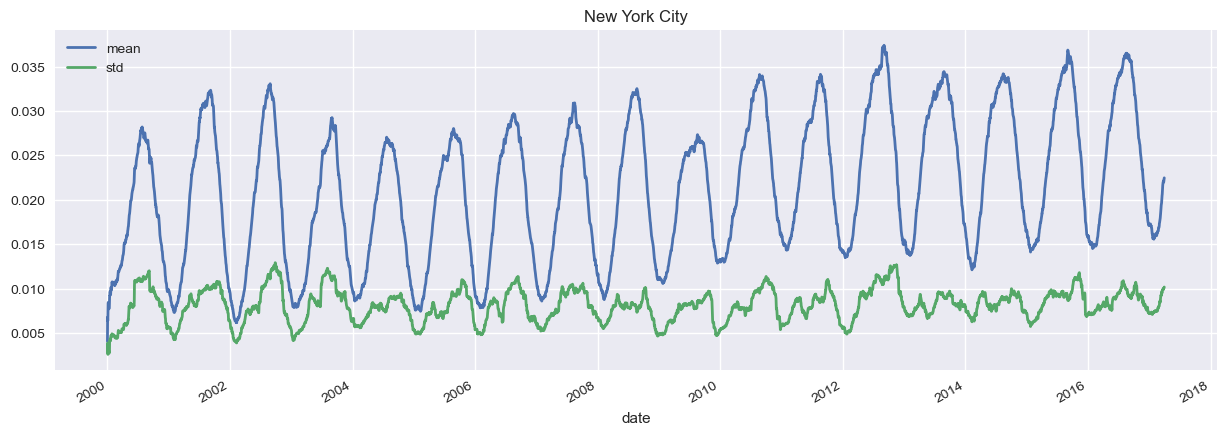

In [19]:
# We can also calculate multiple rolling metrics
# We can use the agg() function to calculate multiple metrics

# Import data here
ozone = pd.read_csv(data/'ozone_nyc.csv', parse_dates=['date'], index_col='date')

# # Calculate 90d rolling mean for the last price
ozone = ozone.Ozone.rolling('90D').agg(['mean','std'])

# Plot data
ozone.plot(title='New York City',figsize=(15, 5))
plt.show()

In [20]:
# We now learn about window functions
# Window functions are used to calculate metrics over a specified period of time
# We will be expanding window functions
# Expanding window functions are used to calculate metrics over a period of time that increases with each new data point

# Import data here
google = pd.read_csv(data/'google.csv', parse_dates=['Date'], index_col='Date').dropna()

# Calculate differences here
differences = google.diff().dropna()

# Select start price here
start_price = google.first('D')

# Calculate cumulative sum 
cumulative_sum = start_price.append(differences).cumsum()

# Validate cumulative sum equals data
print(google.equals(cumulative_sum))


True


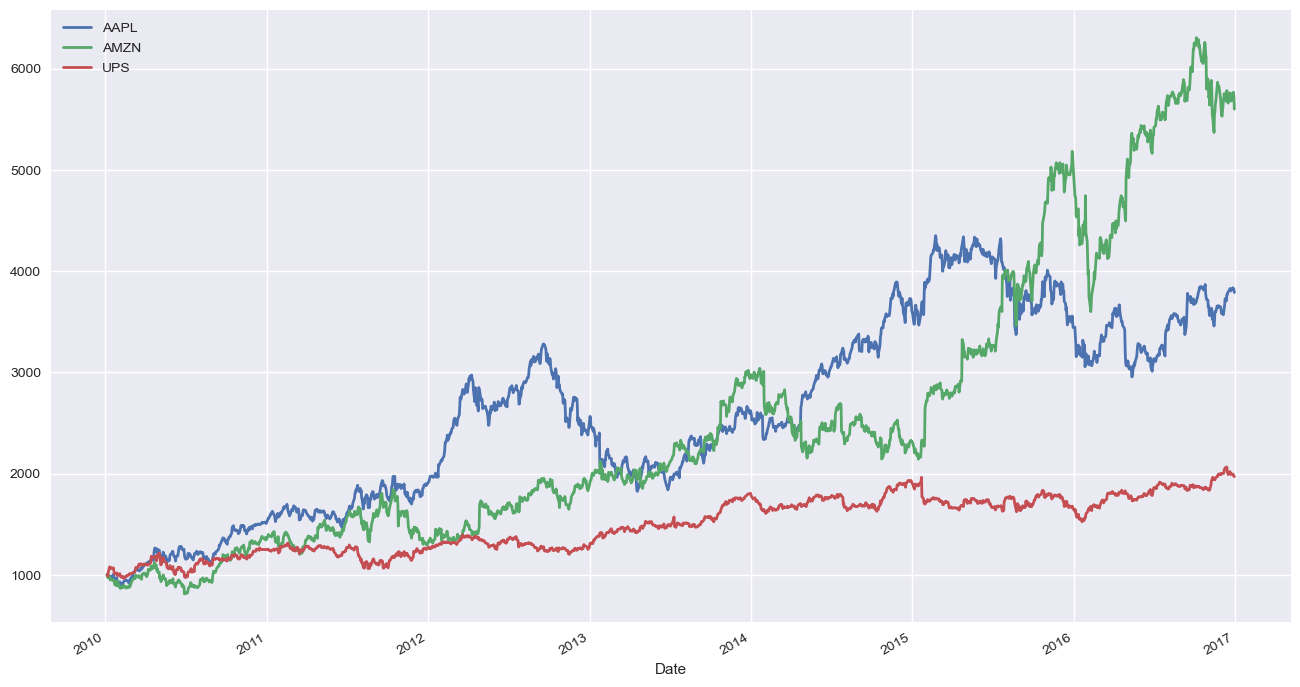

In [21]:
# We can also use the cumprod() function to calculate the cumulative product
# The cumulative product is the product of the data over a specified period of time

# Import data here
stock = pd.read_csv(data/'stock_data.csv', parse_dates=['Date'], index_col='Date').dropna()
stock = stock[['AAPL','AMZN','UPS']]

# Define your investment
investment = 1000

# Calculate the daily returns here
returns = stock.pct_change(1)

# Calculate the cumulative returns here
returns_plus_one = returns + 1
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show()


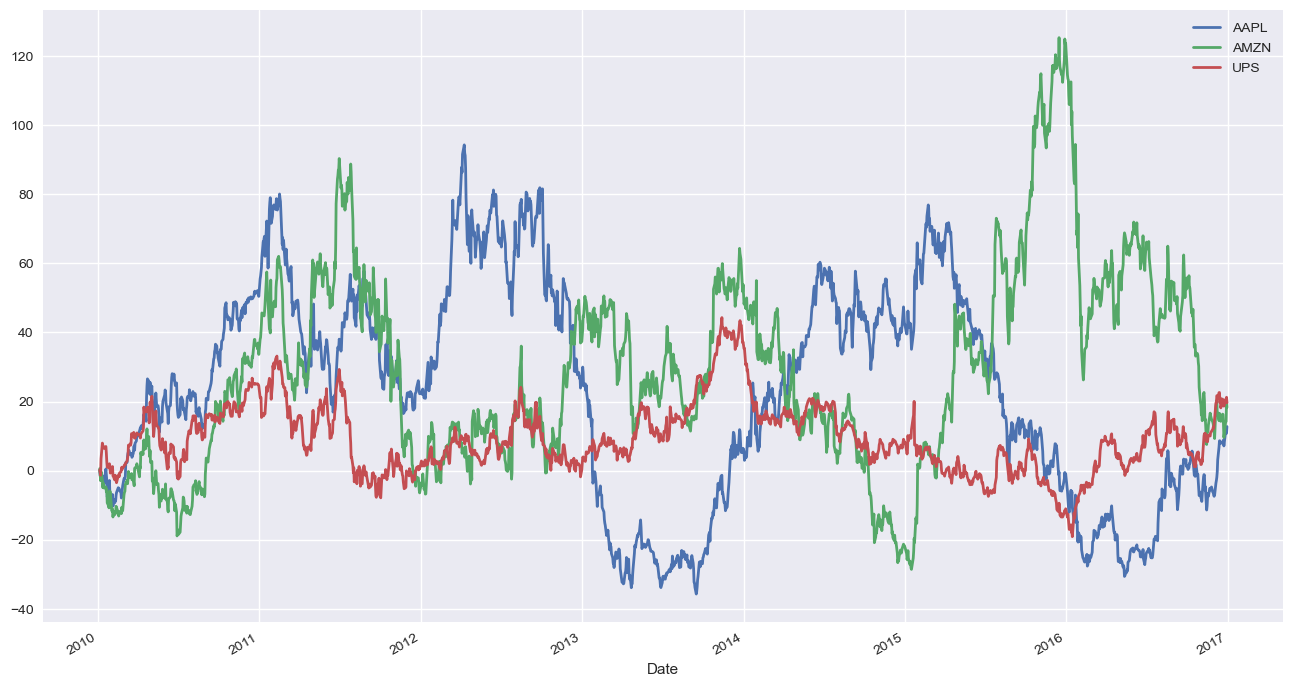

In [22]:
# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = stock.pct_change(1)

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show()

## A Case Study: SP500 Random Walk and Simulations

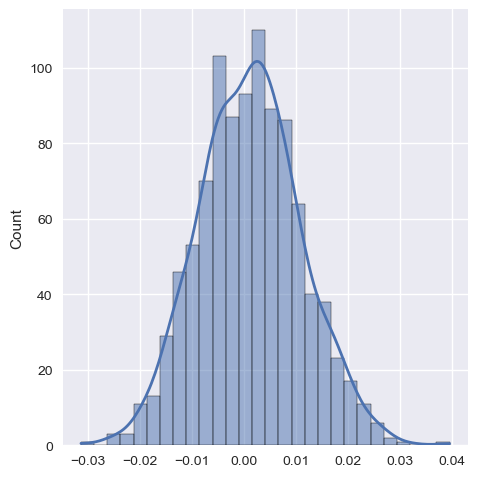

In [26]:
# Set the random seed to 42
np.random.seed(42)

# create a array of random variables normally distributed
# We set a mean of 0.001, a standard deviation 0.01 and size of 1000
# We then plot the distribution of the random variables
random_returns = np.random.normal(loc=0.001, scale=0.01, size=1000)
type(random_returns)
sns.displot(random_returns, kde=True)
plt.show()

In [ ]:
# We create a pandas series of the random returns
return_series = pd.Series(random_returns)

# We calculate the cumulative product of the random returns
# We then subtract 1 to get the cumulative returns
# We then multiply by 100 to get the cumulative returns in percentage
random_prices = return_series.add(1).cumprod().sub(1)
random_prices.mul(100)[0:5]

0    0.596714
1    0.558222
2    1.310084
3    2.954377
4    2.816260
dtype: float64

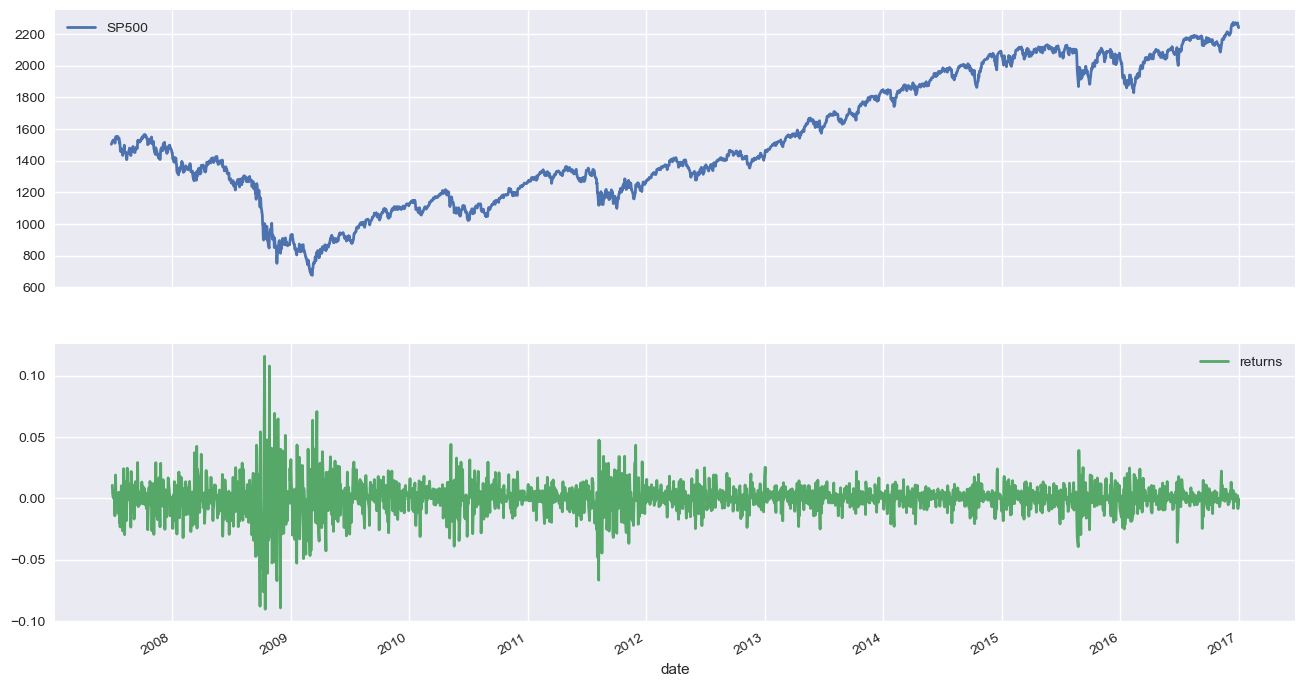

In [24]:
# We can also use the random_walk() function to generate random returns
# We can use the add() function to add 1 to the random returns
# We can use the cumprod() function to calculate the cumulative product
# We can use the sub() function to subtract 1 from the cumulative product
# We can use the mul() function to multiply by 100 to get the cumulative returns in percentage

# Import data here
stock = pd.read_csv(data/'sp500.csv', parse_dates=['date'], index_col='date')

# Calculate daily returns here
stock['returns'] = stock.SP500.pct_change()

stock.plot(subplots=True)
plt.show()

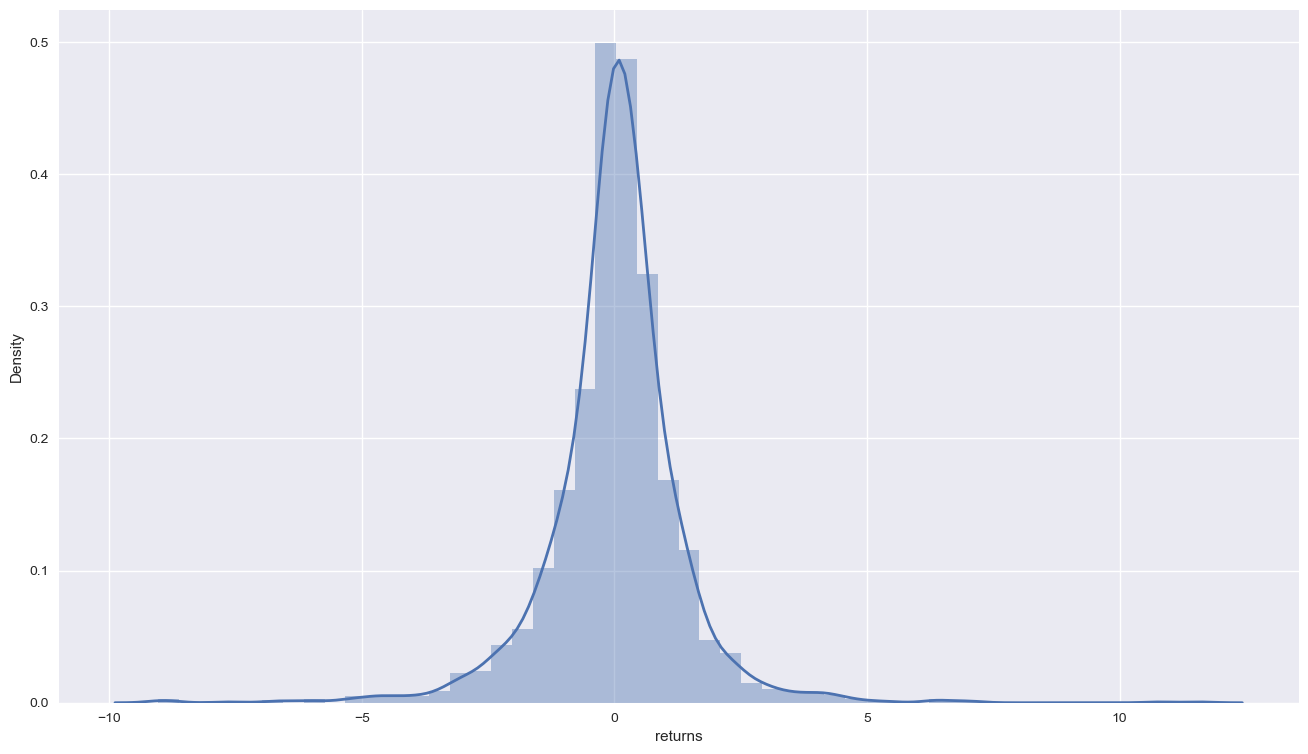

In [216]:
# Plot the distribution of the daily returns
sns.distplot(stock.returns.dropna().mul(100))
plt.show()

### Generate random S&P 500 returns

In [28]:
sample = pd.read_csv(data/'sp500.csv', parse_dates=['date'], index_col='date')
sample['returns'] = sample.SP500.pct_change().dropna()
n_obs = sample.shape[0]
random_walk = 